In [4]:
% some housekeeping stuff
register_graphics_toolkit ("gnuplot");
%available_graphics_toolkits ();
graphics_toolkit ("gnuplot")
clear
%warning off
format short e
% end of housekeeping


The gnuplot graphics toolkit is not actively maintained and has a number
of limitations that are unlikely to be fixed.  Communication with gnuplot
uses a one-directional pipe and limited information is passed back to the
Octave interpreter so most changes made interactively in the plot window
will not be reflected in the graphics properties managed by Octave.  For
example, if the plot window is closed with a mouse click, Octave will not
be notified and will not update its internal list of open figure windows.
The qt toolkit is recommended instead.


# Strong Acids

For HCl in water (for example) the electroneutrality expression can be written:

$[\mathrm{H}^+]=[\mathrm{OH}^-]+[\mathrm{Cl}^-]$

And with substitution of the Kw expression for [H+] and substituting in the total chloride for [Cl-]

$[\mathrm{H}^+]=\dfrac{K_w}{[\mathrm{H}^+]}+\mathrm{Cl_T}$

Depnding on the $\mathrm{Cl_T}$ value we can solve the quadratic equation to determine pH, or use the simplifying assumption that [H+]>>[OH-] and solve the reduced equation [H+]=ClT.

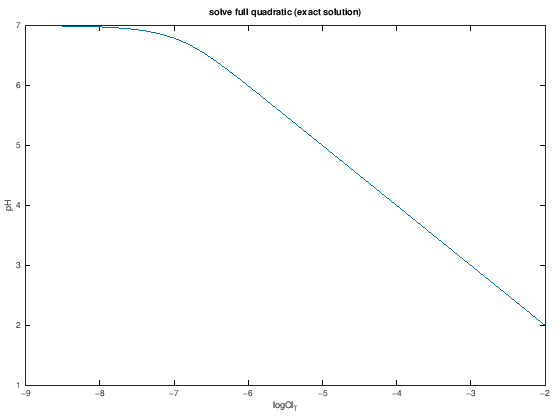

In [5]:
logClT=-9:0.1:-2; ClT=10.^logClT;
Kw=1e-14;
for i=1:size(logClT,2)
    a=1; b=-ClT(i); c=-Kw;
    t=roots([a b c]);
    H=t(real(t)>0&imag(t)==0);
    pHexact(i)=-log10(H);
end
plot(logClT,pHexact,'linewidth',2)
set(gca,'linewidth',2,'fontsize',12)
xlabel('logCl_T','fontsize',12)
ylabel('pH','fontsize',12)
title('solve full quadratic (exact solution)','fontsize',14)
    

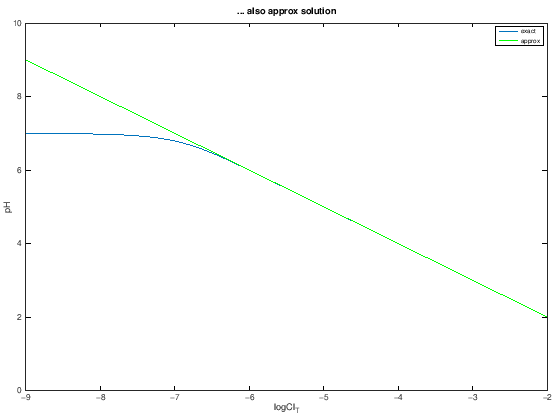

In [6]:
for i=1:size(logClT,2)
    H=ClT(i);
    pHapprox(i)=-log10(H);
end
plot(logClT,pHexact,'linewidth',2,logClT,pHapprox,'g','linewidth',2)
legend('exact','approx')
set(gca,'linewidth',2,'fontsize',12)
xlabel('logCl_T','fontsize',12)
ylabel('pH','fontsize',12)
title('... also approx solution','fontsize',14)